# Epileptic seizure detection from EEG signals using Deep Learning
  
  

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preprocessing

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
X=df.values

In [4]:
X=X[:,1:-1]


In [47]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [48]:
print(X.shape,y.shape)

(11500, 178) (11500,)


# Intuition of the Epileptical Signal In the Dataset 

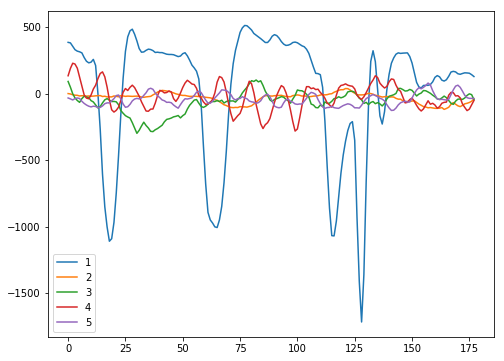

In [49]:
plt.figure(figsize=(8,6))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating Artifitial Neural Net Model For the Classification 

In [50]:
model=Sequential()


model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               11776     
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_24 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_25 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
__________

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [70]:
model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],10,200,verbose=2,validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:]))

Train on 9200 samples, validate on 2300 samples
Epoch 1/200
 - 2s - loss: 0.0056 - acc: 0.9988 - val_loss: 0.2971 - val_acc: 0.9475
Epoch 2/200
 - 2s - loss: 0.0095 - acc: 0.9980 - val_loss: 0.2857 - val_acc: 0.9511
Epoch 3/200
 - 2s - loss: 0.0087 - acc: 0.9978 - val_loss: 0.2719 - val_acc: 0.9477
Epoch 4/200
 - 2s - loss: 0.0127 - acc: 0.9969 - val_loss: 0.3369 - val_acc: 0.9490
Epoch 5/200
 - 2s - loss: 0.0115 - acc: 0.9978 - val_loss: 0.2897 - val_acc: 0.9498
Epoch 6/200
 - 2s - loss: 0.0066 - acc: 0.9988 - val_loss: 0.2858 - val_acc: 0.9528
Epoch 7/200
 - 2s - loss: 0.0040 - acc: 0.9993 - val_loss: 0.3001 - val_acc: 0.9488
Epoch 8/200
 - 2s - loss: 0.0105 - acc: 0.9975 - val_loss: 0.3562 - val_acc: 0.9455
Epoch 9/200
 - 2s - loss: 0.0189 - acc: 0.9953 - val_loss: 0.3001 - val_acc: 0.9474
Epoch 10/200
 - 2s - loss: 0.0110 - acc: 0.9968 - val_loss: 0.3046 - val_acc: 0.9491
Epoch 11/200
 - 2s - loss: 0.0101 - acc: 0.9971 - val_loss: 0.2953 - val_acc: 0.9474
Epoch 12/200
 - 2s - loss:

Epoch 97/200
 - 2s - loss: 0.0338 - acc: 0.9940 - val_loss: 0.3512 - val_acc: 0.9376
Epoch 98/200
 - 2s - loss: 0.0322 - acc: 0.9947 - val_loss: 0.3718 - val_acc: 0.9350
Epoch 99/200
 - 2s - loss: 0.0371 - acc: 0.9944 - val_loss: 0.3196 - val_acc: 0.9323
Epoch 100/200
 - 2s - loss: 0.0238 - acc: 0.9958 - val_loss: 0.3582 - val_acc: 0.9375
Epoch 101/200
 - 2s - loss: 0.0290 - acc: 0.9954 - val_loss: 0.3554 - val_acc: 0.9337
Epoch 102/200
 - 2s - loss: 0.0227 - acc: 0.9965 - val_loss: 0.3059 - val_acc: 0.9386
Epoch 103/200
 - 2s - loss: 0.0225 - acc: 0.9964 - val_loss: 0.3371 - val_acc: 0.9341
Epoch 104/200
 - 2s - loss: 0.0384 - acc: 0.9949 - val_loss: 0.3502 - val_acc: 0.9310
Epoch 105/200
 - 2s - loss: 0.0242 - acc: 0.9960 - val_loss: 0.3580 - val_acc: 0.9310
Epoch 106/200
 - 2s - loss: 0.0375 - acc: 0.9937 - val_loss: 0.3234 - val_acc: 0.9307
Epoch 107/200
 - 2s - loss: 0.0299 - acc: 0.9930 - val_loss: 0.3398 - val_acc: 0.9313
Epoch 108/200
 - 2s - loss: 0.0196 - acc: 0.9960 - val_lo

Epoch 193/200
 - 2s - loss: 0.0188 - acc: 0.9950 - val_loss: 0.3128 - val_acc: 0.9295
Epoch 194/200
 - 2s - loss: 0.0142 - acc: 0.9964 - val_loss: 0.3691 - val_acc: 0.9277
Epoch 195/200
 - 2s - loss: 0.0137 - acc: 0.9968 - val_loss: 0.3551 - val_acc: 0.9278
Epoch 196/200
 - 2s - loss: 0.0130 - acc: 0.9972 - val_loss: 0.3723 - val_acc: 0.9310
Epoch 197/200
 - 2s - loss: 0.0187 - acc: 0.9958 - val_loss: 0.3248 - val_acc: 0.9277
Epoch 198/200
 - 2s - loss: 0.0183 - acc: 0.9960 - val_loss: 0.3074 - val_acc: 0.9321
Epoch 199/200
 - 2s - loss: 0.0155 - acc: 0.9967 - val_loss: 0.2996 - val_acc: 0.9311
Epoch 200/200
 - 2s - loss: 0.0138 - acc: 0.9968 - val_loss: 0.3389 - val_acc: 0.9292


# Accuracy on Validation Set

In [121]:
ypred=model.predict((X_test[:,::4]-X_test.mean())/X_test.std())
ypred.shape

(2300, 5)

In [122]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [123]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1

In [124]:
yp.shape

(2300,)

In [125]:
np.unique(yo)

array([1.])

In [126]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

In [127]:
yo.shape

(2300,)

In [128]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if y_test[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [131]:
np.unique(yo)

array([0., 1.])

In [132]:
np.unique(yp)

array([0., 1.])

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(yo,yp)

0.9895652173913043